# EDA of the flight delay project

In [93]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta

RSEED = 42

In [94]:
# Load data
df_train = pd.read_csv("data/Train.csv")
df_test = pd.read_csv("data/Test.csv")

In [95]:
df_train.columns, df_test.columns

(Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
        'AC', 'target'],
       dtype='object'),
 Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
        'AC'],
       dtype='object'))

In [96]:
df_train.head(2)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0


In [97]:
# Make dates numerical
df_train.STD = pd.to_datetime(df_train.STD, format='%Y-%m-%d %H:%M:%S')
df_train.STA = pd.to_datetime(df_train.STA, format='%Y-%m-%d %H.%M.%S')
df_train["DURATION"] = (df_train.STA - df_train.STD) / timedelta(minutes = 1)

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   ID        107833 non-null  object        
 1   DATOP     107833 non-null  object        
 2   FLTID     107833 non-null  object        
 3   DEPSTN    107833 non-null  object        
 4   ARRSTN    107833 non-null  object        
 5   STD       107833 non-null  datetime64[ns]
 6   STA       107833 non-null  datetime64[ns]
 7   STATUS    107833 non-null  object        
 8   AC        107833 non-null  object        
 9   target    107833 non-null  float64       
 10  DURATION  107833 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 9.0+ MB


In [99]:
# Get categorical variables
df_train.nunique()

ID          107833
DATOP         1011
FLTID         1861
DEPSTN         132
ARRSTN         128
STD          81697
STA          85136
STATUS           5
AC              68
target         968
DURATION       764
dtype: int64

In [100]:
df_train["STATUS"].unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

In [101]:
df_train["STATUS"].value_counts()

STATUS
ATA    93679
SCH    13242
DEP      467
RTR      294
DEL      151
Name: count, dtype: int64

In [102]:
df_train

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,DURATION
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,145.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,110.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,155.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,170.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02:00:00,SCH,TU 32AIML,0.0,180.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09:00:00,SCH,UG AT7AT7,0.0,60.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12:50:00,SCH,TU 736IOK,0.0,470.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18:45:00,ATA,TU CR9ISA,0.0,45.0


array([[<Axes: title={'center': 'STD'}>, <Axes: title={'center': 'STA'}>],
       [<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'DURATION'}>]], dtype=object)

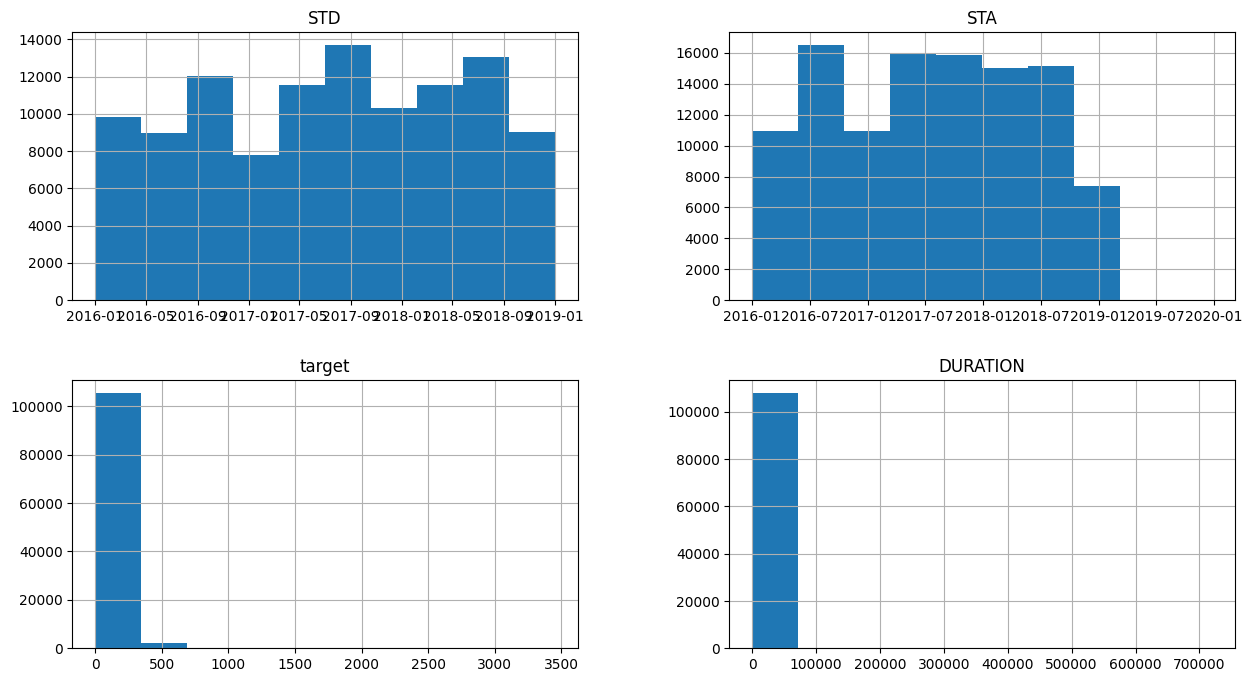

In [103]:
# Histograms of categorcial and numeric features
df_train.hist(figsize=(15,8))

In [104]:
# Most of the time and target values are small. There could be some outliers
df_train["target"].sort_values(axis=0,ascending=False).head(10)
# -> These are not outliers but flights with a very high delay

48878    3451.0
99731    3317.0
77495    3245.0
59199    3025.0
10123    2980.0
50779    2942.0
81542    2835.0
51435    2746.0
86009    2745.0
78095    2745.0
Name: target, dtype: float64

In [105]:
df_train["DURATION"].sort_values(axis=0,ascending=False).head(10)
# questionable values which are much to high. Check again!

68355     719520.0
104441    598980.0
107433    580320.0
104084    534240.0
68102     524160.0
70616     384480.0
107595    380460.0
107288    366780.0
106294    295620.0
69431     292020.0
Name: DURATION, dtype: float64

In [106]:
df_train["DURATION_LOG"] = df_train["DURATION"].transform("log")

<Axes: xlabel='STATUS', ylabel='Count'>

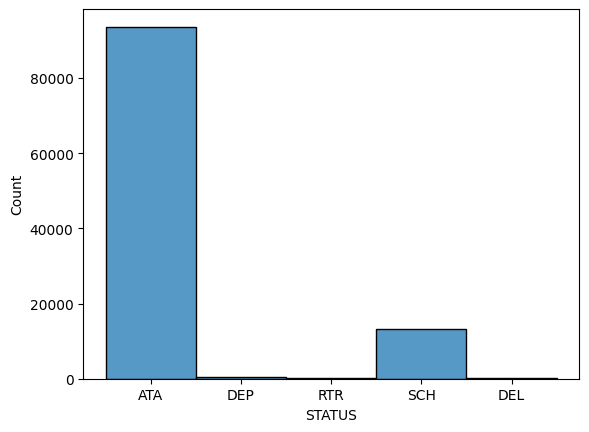

In [107]:
sns.histplot(df_train["STATUS"],discrete=True)

<Axes: xlabel='DURATION_LOG', ylabel='target'>

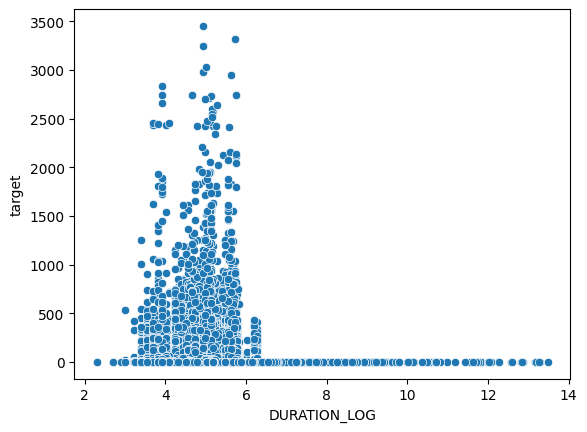

In [108]:
# Depence between log transformed time and target
sns.scatterplot(df_train,x="DURATION_LOG",y="target")

In [75]:
# Check amount of zero values in target
df_train.loc[df_train["target"]>0, "delay>0"] = ">0"
df_train.loc[df_train["target"]==0, "delay>0"] = "0"
df_train["delay>0"].value_counts()

delay>0
>0    69665
0     38168
Name: count, dtype: int64

---
Try to find the flights where the delay is 0 ALWAYS

In [114]:
df_train["DUR>6.4"] = ((df_train["DURATION_LOG"] > 6.4))
df_train["STATUS_SCH_DEL"] = ((df_train["STATUS"] == "DEL") | (df_train["STATUS"] == "SCH"))

In [ ]:
# High durations always lead to a STATUS of SCH
df_train[df_train["DUR>6.4"]==True]["STATUS"].value_counts()

STATUS
SCH    754
Name: count, dtype: int64

<Axes: xlabel='DURATION_LOG', ylabel='target'>

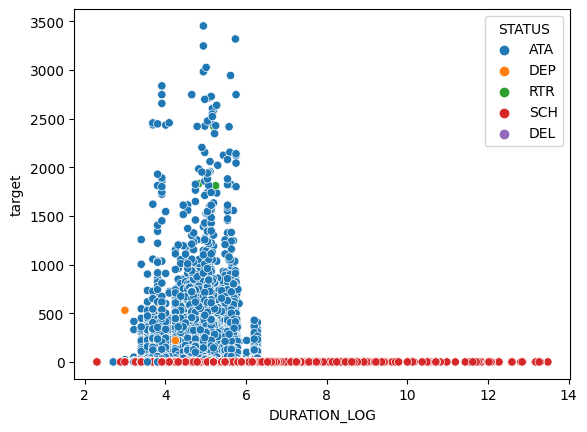

In [ ]:
sns.scatterplot(df_train,x="DURATION",y="target",hue="STATUS")

<Axes: xlabel='DURATION', ylabel='target'>

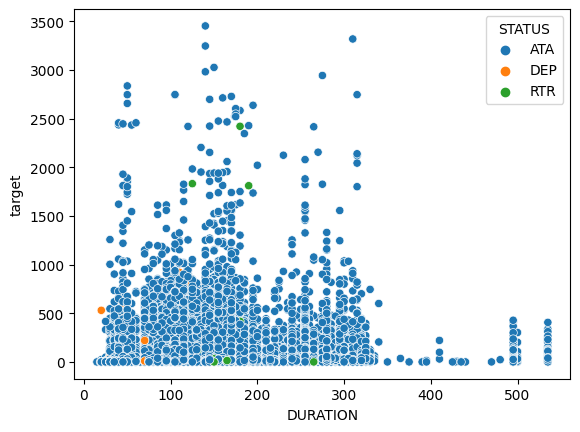

In [ ]:
sns.scatterplot(df_train[df_train["STATUS_SCH_DEL"]==False],x="DURATION",y="target",hue="STATUS")

-> Using a delay of 0 if STATUS in ["SCH","DEL"] and the mean of all others otherwise could be a good baseline model

### Results

- many categorical variables with many different entries -> will create many new dummy features
- Dates can be replaced by DURATION and maybe also month/day/year/time
- Duration variable is very skewed -> must be log transformed
- Target variable is very skewed -> ???
- Deeper understanding of STATUS (Some Status could be dropped?!)
- Is DATOP equal to the date of STD (if yes could be dropped)
- Dependencies between features (e.g. FLTID-DEPSTN...)
- deeper understanding of AC

In [ ]:
#df_train["airline_code"] = df_train['FLTID'].str.split(' ').str[0]
#df_train["flt_num"] = df_train['FLTID'].str.split(' ').str[1]
# df_train.drop(columns=["FLTID"], axis=1, inplace=True)
#df_train["AC_airline_code"] = df_train['AC'].str.split(' ').str[0]
#df_train["AC_num"] = df_train['AC'].str.split(' ').str[1]
#df_train["STA_day"] = df_train['STA'].dt.day_of_week
#df_train["STA_month"] = df_train['STA'].dt.month
#df_train["STD_day"] = df_train['STD'].dt.day_of_week
#df_train["STD_month"] = df_train['STD'].dt.month
#df_train["route"] = df_train["DEPSTN"] + "-" + df_train["ARRSTN"]